In [52]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.svm import SVC
from sklearn.utils import class_weight
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
%matplotlib inline

In [31]:
pd.set_option('display.max_columns', 11)

In [32]:
# loading in the data
wine = datasets.load_wine()

In [33]:
# viewing the object type our 'wine' variable is referencing
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [34]:
# Creating a dataframe
df = pd.DataFrame(wine['data'])

In [35]:
# Assigning the correct feature names for each column in the dataframe
df.columns = wine['feature_names']

In [36]:
# Adding the target to our dataframe
df['target'] = wine['target']

In [37]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,...,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,...,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,...,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,...,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,...,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,...,4.32,1.04,2.93,735.0,0


In [8]:
# Viewing if any of the columns contain obvious null values
df.isna().mean()

alcohol                         0.0
malic_acid                      0.0
ash                             0.0
alcalinity_of_ash               0.0
magnesium                       0.0
total_phenols                   0.0
flavanoids                      0.0
nonflavanoid_phenols            0.0
proanthocyanins                 0.0
color_intensity                 0.0
hue                             0.0
od280/od315_of_diluted_wines    0.0
proline                         0.0
target                          0.0
dtype: float64

In [48]:
pd.set_option('display.max_columns', 100)
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


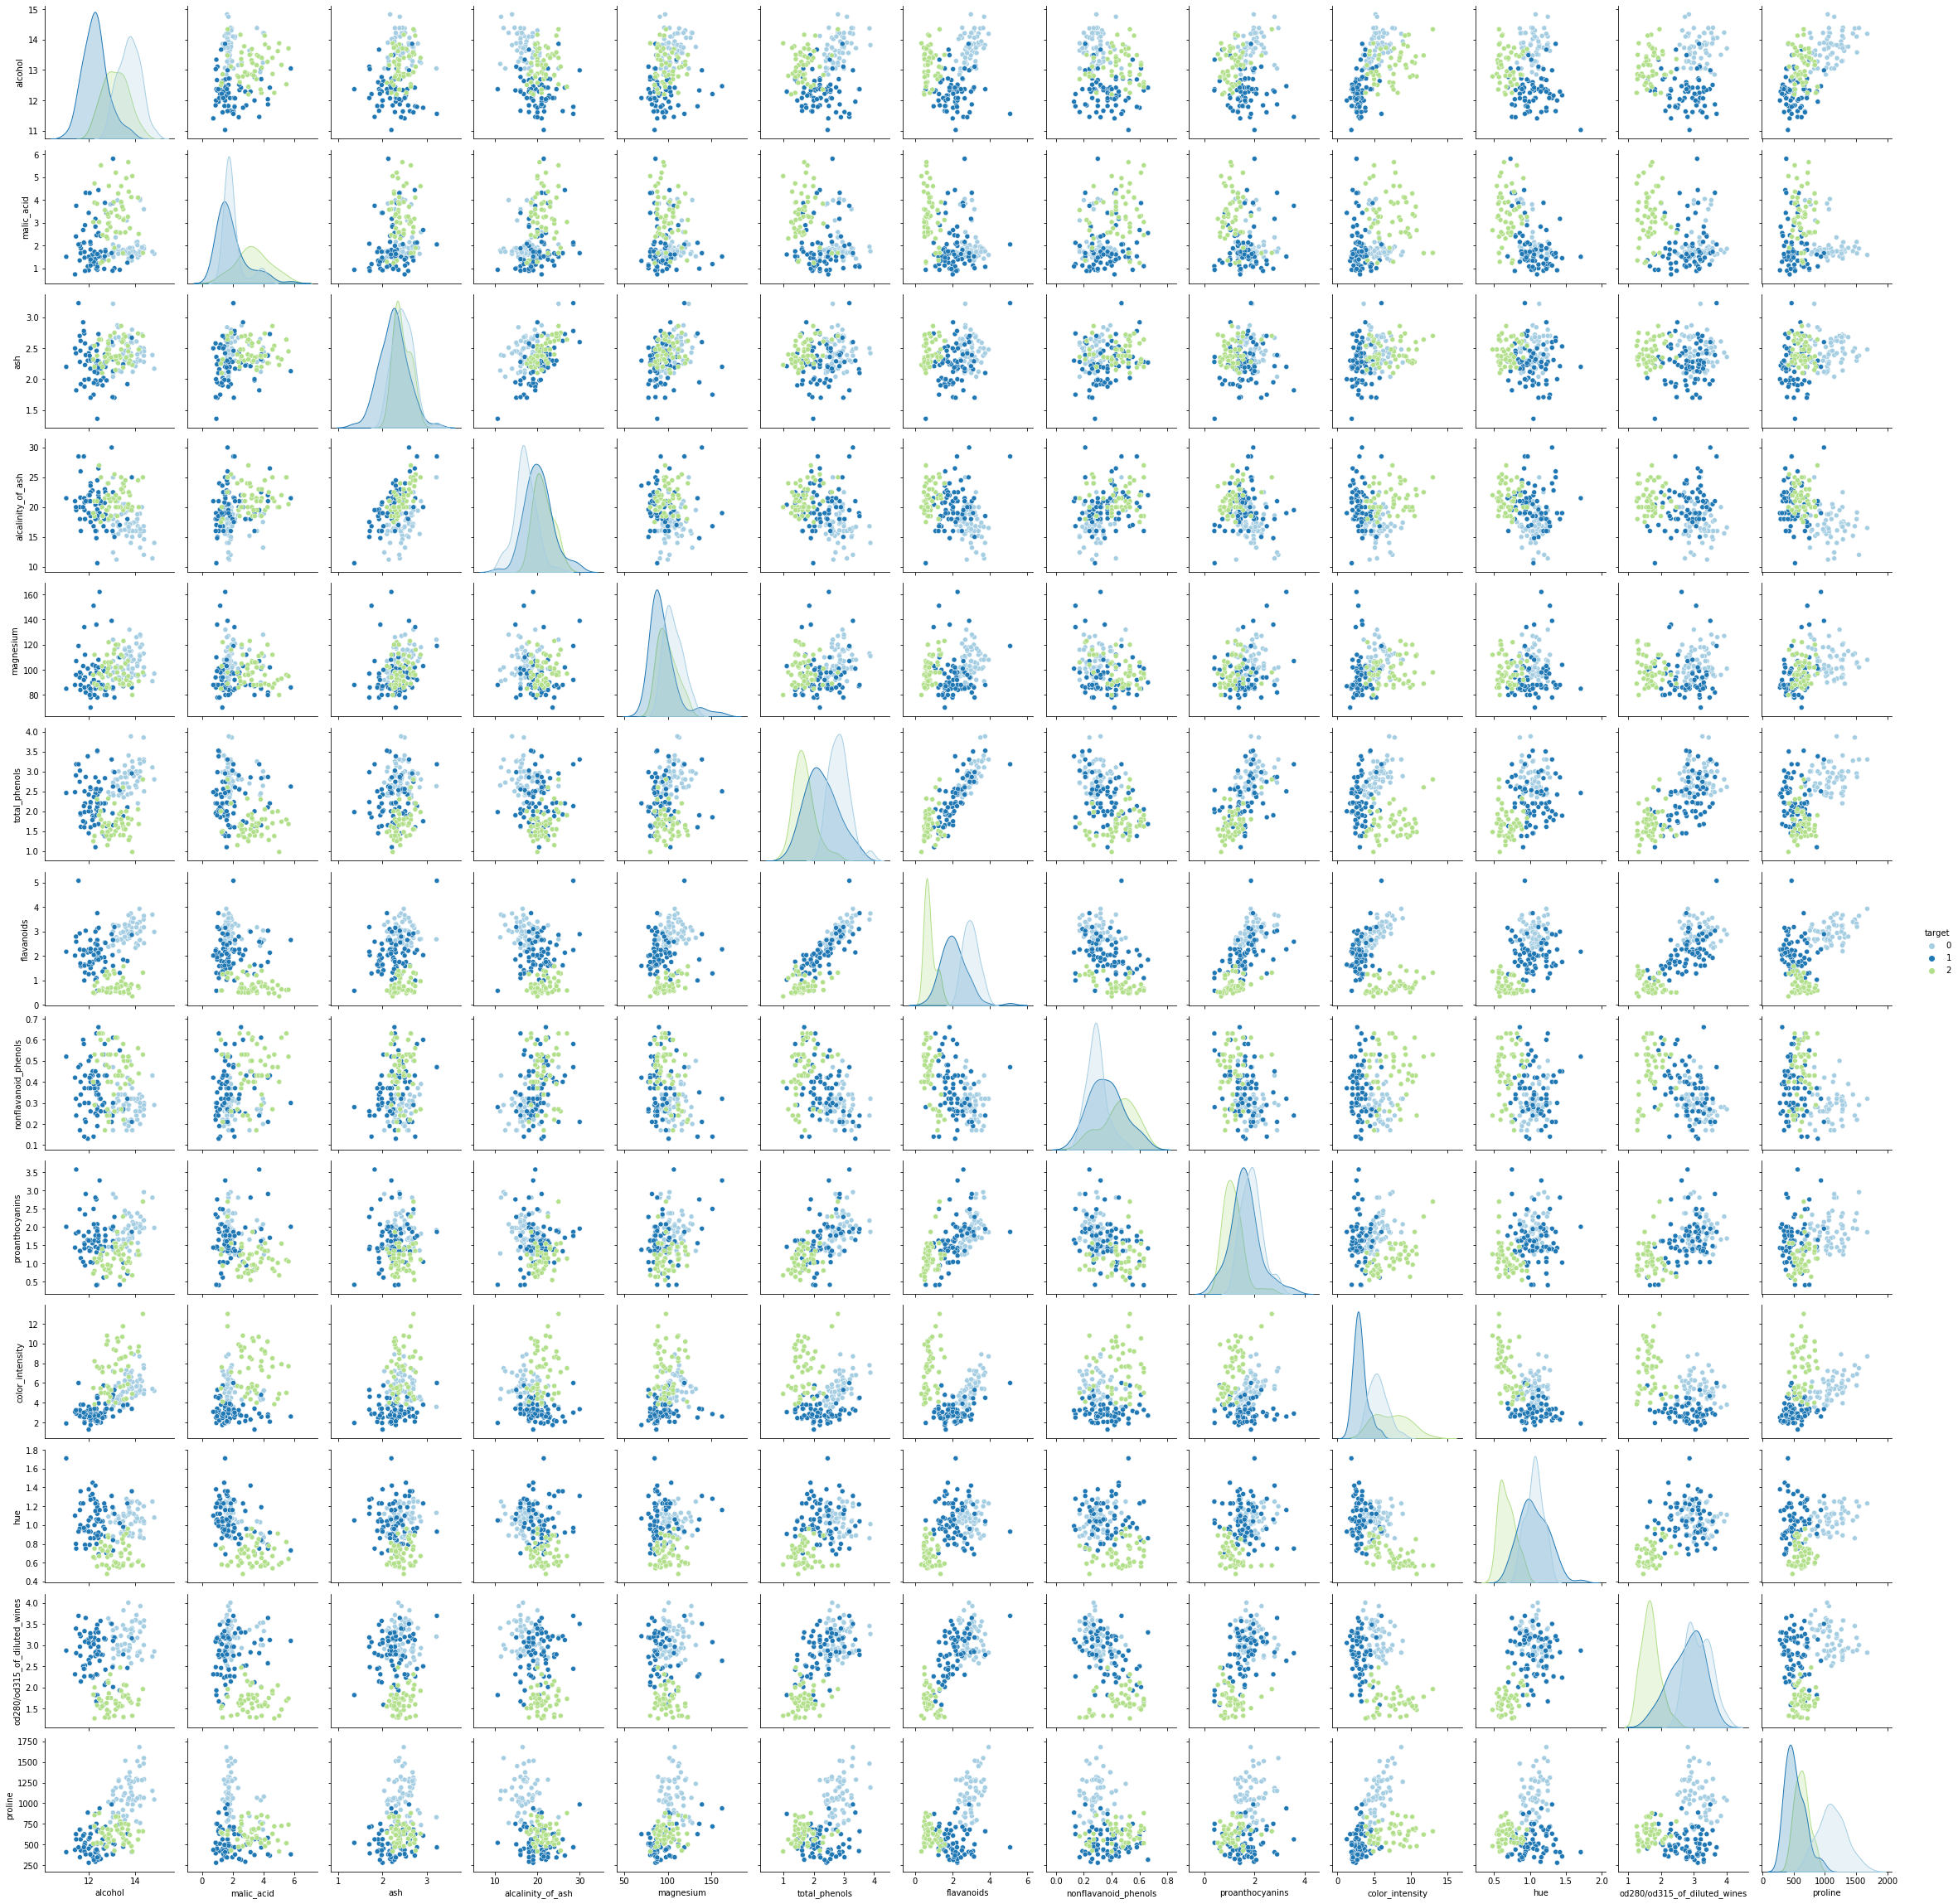

In [40]:
sns.pairplot(df, hue='target', palette='Paired');

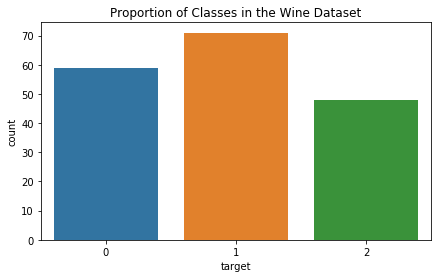

In [41]:
plt.figure(figsize=(7,4))
sns.countplot(x=df['target'])
plt.title('Proportion of Classes in the Wine Dataset');

In [11]:
X = df.drop(columns='target')
y = df['target']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Making Class Weights

In [54]:
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), 
                                                  y=y_train)
class_weights_dict = {0: class_weights[0], 1: class_weights[1], 2: class_weights[2]}
print(f"Our class weights:\n{class_weights_dict}")

Our class weights:
{0: 1.0075757575757576, 1: 0.8364779874213837, 2: 1.2314814814814814}


### How we would fit the model without using a pipeline to preprocess the training set

In [55]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
svm = SVC(class_weight=class_weights_dict)
svm.fit(X_train_scaled, y_train)

SVC(class_weight={0: 1.0075757575757576, 1: 0.8364779874213837,
                  2: 1.2314814814814814})

In [57]:
y_pred = svm.predict(X_test_scaled)

In [71]:
metrics.accuracy_score(y_test, y_pred)

0.9777777777777777

In [72]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.95      1.00      0.97        18
           2       1.00      0.92      0.96        12

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



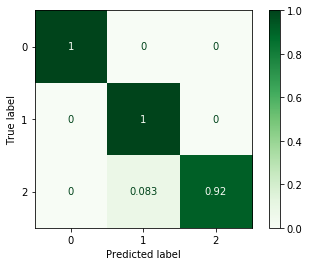

In [73]:
metrics.plot_confusion_matrix(svm, X_test_scaled, y_test, normalize='true', cmap='Greens');

### Using a Pipeline for the same process

In [74]:
pipe = Pipeline(steps=[('scaler', StandardScaler()), 
                      ('svm', SVC())])

In [75]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC())])

In [70]:
pipe.score(X_test, y_test)

0.9777777777777777

In [80]:
y_pred_pipe = pipe.predict(X_test)

In [81]:
print(metrics.classification_report(y_test, y_pred_pipe))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.95      1.00      0.97        18
           2       1.00      0.92      0.96        12

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



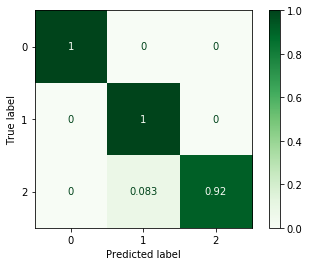

In [78]:
metrics.plot_confusion_matrix(pipe, X_test, y_test, normalize='true', cmap='Greens');